In [4]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt

In [37]:
# read data from .npy files for formaldehyde casci(8,8) calculations

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/rmandern/code/SCQED-PCQED/data/"

# these file names should still be good
E_npy_file = npy_folder + "OH_origin_scan_631g_updated_Energies.npy"
Mu_npy_file = npy_folder + "OH_origin_scan_631g_updated_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

print(Mu_array[:4, :4, 2, 0])

print(np.shape(E_array))
print(np.shape(Mu_array))
print(np.ndim(E_array))
# print(E_array)
#print(Mu_array[,98,1,:])

[[ 5.23095181e-01  7.94113675e-14 -2.20771972e-13  2.63922387e-13]
 [ 7.94113675e-14 -1.08687688e+00  4.72931152e-15 -3.67680359e-15]
 [-2.20771972e-13  4.72929758e-15 -1.08687688e+00  3.85229976e-14]
 [ 2.63922387e-13 -3.67680359e-15  3.85229976e-14 -1.08734586e+00]]
(100, 21)
(100, 100, 3, 21)
2


In [35]:
trans = np.transpose(Mu_array, (1,0,2,3))

np.allclose(Mu_array,trans, 1e-9, 1e-9)

True

In [33]:
UT = np.triu(Mu_array, k=0)  # k=0 means not including main diagional, k =-1 including main diagional. 
LT = np.tril(Mu_array, k=0)

# print(np.ndim(UT))
print(LT[2,2])
print(UT[2,4])

[[ 7.69642365e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.43928277e-14  1.02252209e-14  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.08687688e+00 -2.97660301e+00 -4.86632914e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0

In [3]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    O            0.000000000000     0.000000000000     -0.068516219320
    H            0.000000000000    -0.790689573744    0.543701060715
    H            0.000000000000     0.790689573744    0.543701060715
    0 1
    symmetry c1
    no_reorient
    no_com
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.36749303600696764,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -121.6767825482576342
CQED-RHF One-electron energy      = -121.6764763272477268
Nuclear repulsion energy          = 8.8014655645634061
Dipole energy                     = 0.0000065684191898
SCF Iteration   1: Energy = -74.9644797826129548   dE = -7.49645E+01   dRMS = 5.97076E-06
SCF Iteration   2: Energy = -74.9644797845252242   dE = -1.91227E-09   dRMS = 2.02758E-06
SCF Iteration   3: Energy = -74.9644797847504805   dE = -2.25256E-10   dRMS = 7.08594E-07
SCF Iteration   4: Energy = -74.9644797847895887   dE = -3.91083E-11   dRMS = 1.22037E-07
SCF Iteration   5: Energy = -74.9644797847906688   dE = -1.08002E-12   dRMS = 1.31335E-09
SCF Iteration   6: Energy = -74.9644797847906688   dE =  0.00000E+00   dRMS = 7.73372E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -74.96447978 hartree
Psi4  SCF energy: -74.96466254 hartree
 Completed QED-RHF in 0.20290708541870117 seconds
 Completed 1HSO Build in 5.91278076

In [5]:
d_array = np.linspace(1.0, 3.0, N_R)
N_R = 1000
N_el = 50
N_ph = 10
omega = 0.9760568251 
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_22 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr])      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_22[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [6]:
# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_2002_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE= False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_2002_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1


In [7]:
N_el = 100
N_ph = 4
omega = 0.183747027
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_24 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr])      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_24[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1


# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_2004_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE= False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_2004_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1


In [8]:
N_el = 100
N_ph = 6
omega = 0.183747027
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_26 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr])      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_26[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1


# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_2006_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE= False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_2006_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1

In [9]:
N_el = 100
N_ph = 8
omega = 0.183747027
lambda_vector = np.array([0, 0, 0.01])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_28 = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr])      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_28[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1


# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_2008_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE= False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_2008_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1

In [10]:
# Error = _pcqed_20010_cs[:,0] - _pcqed_210[:,0]
# print(Error)

# abs_error = np.abs(Error)
# mae_10 = np.mean(abs_error)
# print(mae_10)

In [11]:
# instance.fast_build_pcqed_cs_hamiltonian(2, 2, 0, lambda_vector, E_array[:,0], Mu_array[:,:,:,0], neglect_DSE=False)
# instance.fast_build_pcqed_pf_hamiltonian(2, 2, 0, lambda_vector, E_array[:,0], Mu_array[:,:,:,0], neglect_DSE=False)

# print(instance.PCQED_H_CS)
# print(instance.PCQED_H_PF)

In [13]:

# Error2 = _pcqed_22[:,0] - _pcqed_2002_cs[:,0]
# # print(Error)

# Error4 = _pcqed_24[:,0] - _pcqed_2004_cs[:,0]
# Error6 = _pcqed_26[:,0] - _pcqed_2006_cs[:,0]
# Error8 = _pcqed_28[:,0] - _pcqed_2008_cs[:,0]
# Error10 = _pcqed_21[:,0] - _pcqed_2001_cs[:,0]


Error2 = _pcqed_22[:,0] - _pcqed_2001_cs[:,0]
# print(Error)

Error4 = _pcqed_24[:,0] - _pcqed_2001_cs[:,0]
Error6 = _pcqed_26[:,0] - _pcqed_2001_cs[:,0]
Error8 = _pcqed_28[:,0] - _pcqed_2001_cs[:,0]
Error10 = _pcqed_21[:,0] - _pcqed_2001_cs[:,0]

In [16]:
print(Error10)

[ 0.00000000e+00  2.84217094e-14 -2.84217094e-14  5.68434189e-14
  0.00000000e+00  8.52651283e-14  4.26325641e-14 -2.84217094e-14
 -2.84217094e-14  1.42108547e-14  2.84217094e-14 -1.42108547e-14
 -1.42108547e-14  2.84217094e-14 -2.84217094e-14  5.68434189e-14
  2.84217094e-13  8.52651283e-13  2.70006240e-12  7.71649411e-12
  2.07904804e-11]


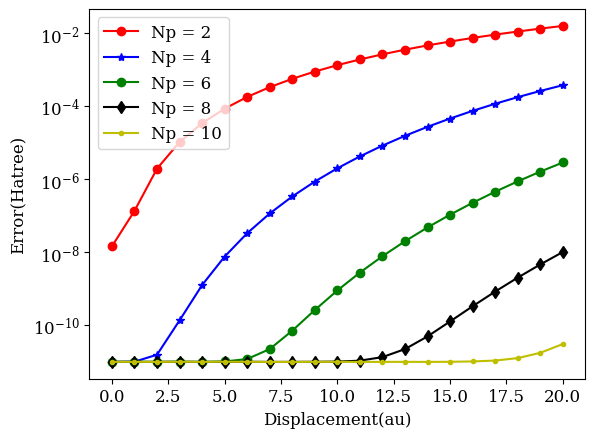

In [29]:
from matplotlib import cm
from matplotlib import rcParams


# plt.plot(d_array,np.log(Error2+1e-11),'ro-', label='Np = 2')
# plt.plot(d_array,np.log(Error4+1e-11),'b-', marker="*", label='Np = 4')
# plt.plot(d_array,np.log(Error6+1e-11),'g',  marker="o",label='Np = 6')
# plt.plot(d_array,np.log(Error8 + 1e-11),'k',  marker="d",label='Np = 8')
# plt.plot(d_array,np.log(Error10 +1e-11),'y',  marker=".",label='Np = 10')

plt.plot(d_array,Error2+1e-11,'ro-', label='Np = 2')
plt.plot(d_array,Error4+1e-11,'b-', marker="*", label='Np = 4')
plt.plot(d_array,Error6+1e-11,'g',  marker="o",label='Np = 6')
plt.plot(d_array,Error8 + 1e-11,'k',  marker="d",label='Np = 8')
plt.plot(d_array,Error10 +1e-11,'y',  marker=".",label='Np = 10')
plt.xlabel('Displacement(au)')
plt.ylabel('Error(Hatree)')
plt.yscale('log')
plt.legend()
plt.savefig("error curve new", dpi=150)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# plt.gca().yaxis.set_major_formatter('{:.12f}'.format)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ylim(-30,0)
# plt.xlim(0,20)
# plt.grid()


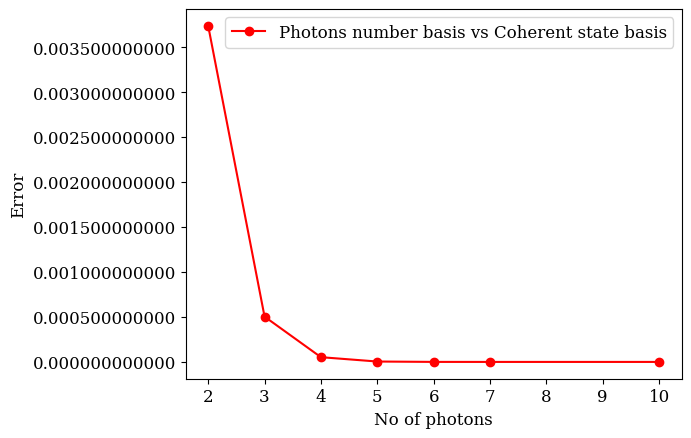

In [15]:
Photon_state_basis = [0.0037363329626397706,0.0005036277955904703 , 5.275052548099557e-05, 4.361768495592904e-06, 2.965296325945539e-07, 1.7145714266353893e-08, 1.5631940186722204e-12 ]
photons = [2,3,4,5,6,7,10]



plt.plot(photons,Photon_state_basis,'ro-', label='Photons number basis vs Coherent state basis')
plt.xlabel('No of photons')
plt.ylabel('Error')
plt.savefig("error Photons number basis vs Coherent state basis", dpi=150)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.12f}'.format)
plt.legend()

In [ ]:
# plt.plot(d_array, _pcqed_cs_22[:,0],'ro-', label="ground-state_cs")
plt.plot(d_array,_pcqed_22[:,0],'ro-', label='ground-state')
plt.plot(d_array,_pcqed_2002_cs[:,0],'bo-', label='ground-state_cs')
# plt.plot(d_array,_pcqed_22[:,6], 'bo', label='2rd')
# plt.plot(d_array,_pcqed_22[:,7], '-' , label='6th excited')

# plt.plot(lambda_val[:,2],_pcqed_502[:,2],'ro-', label='2nd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,3],'b', label='3rd')
# plt.plot(lambda_val[:,2],_pcqed_502[:,4],'y', label='4th')

plt.xlabel('Displacement')
plt.ylabel('Energy')
# plt.ylim(-113.556, -113.50)
# plt.grid()
plt.savefig("ground state", dpi=150)
#plt.text(1.9, -75.300, "No. of Photons = 5", fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
